<a href="https://colab.research.google.com/github/LkLwang99/DataScienceCM3005/blob/main/DS_Mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>CM3005 - Data Science</h1>
<h2>1)Introduction</h2>

The project aims to develop a machine learning model that will aid to help us predict the share price of a stock exchange such as NASDAQ if the US's federal reserve interest rate were to increase or decrease with the use of linear regression algorithm.

<h2>2)Domain-Specific Task and Objectives Of the Project</h2>

The Domain-Specific Task is to identify the relationship between the US's federal reserve interest rate and multiple stock exchanges with linear regression.

The impact of the federal reserve interest rate is tremendous on the stock market and signals a great increment or decrement on stock prices. In 2022, when the federal reserve decides to raise the interest rate of the to 3.9%, we could see major stock exchanges had a decline in the prices of the stocks. In 2022, when the federal reserve had announced the increase in interest rate, the S&P 500 as compared to the previous year had fallen which could be seen from the closing price of S&P 500 according to yahoo finance was at Aug 1st 2022 at 4118.63 and Aug 2 2021 at 4422.81 which was a 7% decrease from the previous year. The same scenario is found in the early 2000s, where the federal reserve interest rate rose in the year 2000 and the S&P had fallen by 10.14% but the interest rate began to increase from 4.63% in january 1999 to 6.40% in december 2000.

The contributions which a linear regression machine learning model could help would be to predict the future stock prices if the federal reserve were to decide to raise or lower the interest rates. The machine learning model could help policymakers make better decisions to mitigate the impact of stock market fluctuations on the stock market.

Therefore, the importance of the interest rates to stock prices is justified by historical events and we would want to see if we are able to predict the stock prices increment or decrement based on the interest rates with time series data of the stock prices and the interest rates of the federal reserve with the following objectives:

<ol>
<li>Gathering the 25-year data of Stock Exchanges And Interest Rate</li>
<li>Data Cleaning </li>
<li>Statistical Analysis Of the Data</li>
<li>Visualisation Of The Data</li>
<li>Building A Machine Learning Model</li>
<li>Validation Of the Machine Learning Model</li>
<li>Feature Engineering</li>
<li>Evaluation Of the Model</li>
</ol>

<h2></h2>


<h2>3)Dataset Description</h2>

<p>For the dataset, the dataset chosen would be the historical stock data prices for several stock index such as Singapore's Straits Time Index, S&P 500 and other major stock indexes. The dataset would be retrieved from the yfinance api which is an open-source and free-to-use api to retrieve data from the yahoo finance. The interest rate would be retrieved from the FRED website with the use of pandas-datareader library as FRED is an accessible database created and maintained by the Research department at Federal Reserve Bank of St. Louis. Therefore, the dataset was collected by making use of the APIs and the pandas_datareader to access the FRED website.
</p>
<br>
<p>The original dataset of the stock indexes collected would be in the following format shown below:

<pre><center>[Date,Open,High,Low,Close,Volume,Dividends,Stocksplits]</center></pre>

The type of the stock indexes retrieved from the yfinance API is in the format where date is shown in datetime format of Year-Month-Date with the hour,minute, seconds and the timezone. The Open,High,Low,Close,Dividends,Stocksplits are
in the format of float and the Volume is in the format of integer. The size of the dataset collected would have 6289 rows and 8 columns which amounts to 50312 data points. </p>
<br>
<p>
Whereas the original dataset of the interest rate collected would be in this format shown below:

<pre><center>[Date, InterestRate]</center></pre>

The type of the date and interest rate retrieved from the FRED website would be displayed as date formatted in Year-Month-Date and the Interest Rate in float. The size of the interest rate dataset which is collected would have 301 rows and 2 columns with the date and interest which amounts to 602 data points as it only consist of interest rate by month.
</p>
<br>
<p>
The final dataset after the preprocessing step to clean out other variables which are not required would be in this format shown below:

<pre><center>[Date,Ticker,interestRate,Price]</center></pre>
</p>
<br>
<p>
An example of the dataset entry would be seen in the example below:

<pre><center>[1999-01-04,GSPC,1229.0,4.63]</center></pre>

From the example displayed, the types of data are shown with date being displayed as year-month-day, the ticker as a string and finally both the interestRate and Price as float. The pre-processing step involves removing unnecessary variables from the stock index dataset and converting the interest from the interest rate dataset from monthly to daily frequency and finally merge the two datasets together as shown in the example before.
</p>
<br>
<p>The size of the final dataset collected and pre-processed should be around 9125 rows of data and 4 columns for both interest rates and stock indexes of different nation which would amount to 36,500 data points.</p>

<center>(432 words)</center>

In [ ]:
## This is the start of the coding and we import all the libraries here.

##If yfinance does not work, please run this before importing yfinance as yf or if pandas_datareader does not work.
##!pip install yfinance
##!pip install pandas_datareader
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
from sklearn.impute import SimpleImputer,KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline


In [ ]:
# List of stock index symbols
# GSPC = S&P 500, STI = Singapore Straits Times Index, N225 = Japan Nikkei 225, HSI = Hong Kong Hang Seng Index, FTSE=100 United Kingdom 100 largest companies listed on the London Stock Exchange,
# 000001.SS = China all stocks (A and B shares) traded on the Shanghai Stock Exchange
symbols = ['^GSPC', '^STI', '^N225', '^HSI', '^FTSE', '000001.SS']

# Fetch historical data for 20 years
startDate = '1999-01-01'
endDate = '2024-01-01'


historicalData = {}

for symbol in symbols:
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=startDate, end=endDate)
    historicalData[symbol] = data

In [ ]:
# Retrieve Federal Funds Rate from FRED using the pandas_datareader, the dates(startDate,endDate) variable was defined in the code before.
fedFundsRate = web.DataReader("FEDFUNDS", "fred", startDate, endDate)


<h2>3)Dataset Pre-processing</h2>
For the Pre-processing, we have to create to remove all other unnecessary columns and input two new columns for the ticker of the stock indexes and interest rate from the interest rate dataframe in the original dataframe of the stock indexes into the format of date,ticker,price and interest rate. With this goal in mind, I began to implement the dataframe with the codes below.

The steps begin with printing out the dataframe to find out if all the rows and columns are the same.The next step would be to find out which dates are missing and to impute the missing values or remove the dates from the dataframes that have the dates.



In [ ]:
##The interest rate dataframe only have the monthly interest rates and we need to change it to daily so that both interest rate and stock indices
##have the same dates and can be compared.

#changing the dates to daily
dailyPd = pd.date_range(start=fedFundsRate.index.min(), end=fedFundsRate.index.max(), freq='D')

##resetting index and date to be a new column and updating the interestrate with the fillna method to fillna for the days that are not filled.
interestPdDaily = fedFundsRate.reindex(dailyPd)
interestPdDaily = interestPdDaily.reset_index()
interestPdDaily.rename(columns={'index': 'Date'}, inplace=True)
interestPdDaily.rename(columns={'FEDFUNDS': 'InterestRate'}, inplace=True)
interestPdDaily['InterestRate'] = interestPdDaily['InterestRate'].interpolate(method='linear')

In [ ]:
## The removing the timezones and time in the historicalData to align the days as different stock indexes have different timezone.
for df in historicalData:
  historicalData[df].index = historicalData[df].index.date

In [ ]:
##finding out the missing Dates

#initalizing a list for missing dates
missingDatesArray = []

#using two for loops to get the missing list and initializing the missing date list every iteration of the loop
for df1 in historicalData:
  missingDateArray = []
  for df2 in historicalData:
    if df2!=df1:
      ##finding out the right side which is the part where the original df is missing dates and appending it to the missingDateArray before appending it to the missingDatesArray.
      missingDates = set(historicalData[df2].index) - set(historicalData[df1].index)
      missingDateArray.append(missingDates)
  missingDatesArray.append(missingDateArray)




In [ ]:
## confirmation that the missingDatesArray consist of 5 other missingDates value as there are 6 stock indices in total
## and we obtain the missing dates for each stock indices. ##

for i in missingDatesArray:
   print(len(i))

5
5
5
5
5
5


In [ ]:


###confirming the final array and dates contained are the same amount with the original rows in the dataframe and adding the number of rows that these dates will
### will create

#6289,6255,6126,6161,6312,6048
#211,245,374,339,188,452
#6500,6500,6500,6500,6500,6500

finalMissingDatesArray = []


for j in range(len(missingDatesArray)):
  merged_set = set.union(*missingDatesArray[j])
  finalMissingDatesArray.append(list(merged_set))
print(len(finalMissingDatesArray))



for i in range(len(finalMissingDatesArray)):
  print(len(finalMissingDatesArray[i]))

6
211
245
374
339
188
452


In [ ]:

## the list that contains the dataframe objects for stock indices.
finalStockIndicesDfs = []
#beginning of the for loop to clean each dataframe for the stock indices
for i,df in enumerate(historicalData):
  historicalData[df] = historicalData[df].reset_index() #resetting another index to replace the date so that date can be in the columns.
  historicalData[df].rename(columns={'index': 'Date'}, inplace=True) # renaming column of the date to be date instead of index.
  historicalData[df] = historicalData[df][['Date','Close']] #Choosing the factors that we need for the machine learning.
  historicalData[df]['Ticker']= df #inputting a new column for ticker
  allDates = historicalData[df]['Date'].values.tolist() + finalMissingDatesArray[i]
  allDates.sort()
  newDf = pd.DataFrame({'Date': allDates})

  finalStockIndicesDf = pd.merge(newDf,historicalData[df],on='Date',how='left')
  finalStockIndicesDfs.append(finalStockIndicesDf)




In [ ]:
for i in finalStockIndicesDfs:
  checkMissingValues = i.isnull().values.any()
  print("Does DataFrame have NaN values?:", checkMissingValues)

##imputing the nan values with the most frequent to replace the nan
for idx, i in enumerate(finalStockIndicesDfs):
    imputer = KNNImputer(n_neighbors=2)
    i['Ticker'] = i['Ticker'].fillna(method='ffill')
    # Impute the missing values
    imputedData = imputer.fit_transform(i[['Close']])
    imputedDf = pd.DataFrame(imputedData, columns=['Close'], index=i.index)

    # Update the DataFrame in the list
    i['Close'] = imputedDf['Close']

for i in finalStockIndicesDfs:
  checkMissingValues = i.isnull().values.any()
  print("Does DataFrame have NaN values?:", checkMissingValues)


Does DataFrame have NaN values?: True
Does DataFrame have NaN values?: True
Does DataFrame have NaN values?: True
Does DataFrame have NaN values?: True
Does DataFrame have NaN values?: True
Does DataFrame have NaN values?: True


<ipython-input-10-4c9c7ae6d4cd>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  i['Ticker'] = i['Ticker'].fillna(method='ffill')
<ipython-input-10-4c9c7ae6d4cd>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  i['Ticker'] = i['Ticker'].fillna(method='ffill')
<ipython-input-10-4c9c7ae6d4cd>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  i['Ticker'] = i['Ticker'].fillna(method='ffill')
<ipython-input-10-4c9c7ae6d4cd>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  i['Ticker'] = i['Ticker'].fillna(method='ffill')
<ipython-input-10-4c9c7ae6d4cd>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future versi

Does DataFrame have NaN values?: False
Does DataFrame have NaN values?: False
Does DataFrame have NaN values?: False
Does DataFrame have NaN values?: False
Does DataFrame have NaN values?: False
Does DataFrame have NaN values?: False


In [ ]:
### Merging the finalDf of stock indices and interest rate all together into one single dataframe in 1NF.
finalDf = pd.concat(finalStockIndicesDfs)
finalDf['Date'] = pd.to_datetime(finalDf['Date'])
finalDf.reset_index(drop=True, inplace=True)
finalDf= pd.merge(finalDf,interestPdDaily,on='Date',how='left')

<h2>4)Dataset Statistical Analysis And Visualisations</h2>

For the key series of the dataset, the key series would be the closing prices of the stock which is the focus of where we will be looking at and because of the closing price consisting of several tickers, we have to separate them by tickers as it would be illogical to calculate the statistic of different stock indices of different prices, market capitalisation and currency as they are very different and would lead to inaccurate insights of the dataset.

<h3>4.1)Central Tendencies</h3>


For this secion, we will be looking at the statistical analysis of the dataset and deciding a central tendency of the dataset,types of spread and also the type of distribution.We shall explore on various central tendencies measure such as the Mean,Mode to find which  between the close prices with the 25-year historical data of every stock indices, various types of spread to decide which is to measure the 25-year historical data of stock indices and also the type of distribution.




In [ ]:
###Central Tendencies
groupedByTicker = finalDf.groupby('Ticker')

statisticalResults = groupedByTicker['Close'].agg(
    Min = ('min'),
    Mean=('mean'),
    Mode=lambda x: x.mode()[0],  # Handle ties by taking the first mode
    Median = ('median'),
    Max=("max")
)

print(statisticalResults)

                   Min          Mean          Mode        Median           Max
Ticker                                                                        
000001.SS  1011.499023   2548.144659   2548.144659   2548.144659   6092.057129
^FTSE      3287.000000   6085.761819   6085.761819   6147.300049   8014.299805
^GSPC       676.530029   1947.691057   1947.691057   1455.179993   4796.560059
^HSI       8409.009766  19906.159169  19906.159169  20367.030273  33154.121094
^N225      7054.979980  16440.770884  16440.770884  16140.549805  33753.328125
^STI       1213.819946   2686.797347   2686.797347   2875.800049   3875.770020


From the code and code output results above, we can see that the Min,Max,Mean,Mode and Median for every ticker in the dataframe as every stock indices have different market capitalisation, we should not lump them together but select some of these stock indices to see which measure of central tendency is better and also due to the currency difference, some stock indices might have a higher market capitalisation as shown here.

From the Mean,Mode,Median of the stock indices, these are the things we can deduce from the Stock indices.

<table style="width:100%; border-collapse: collapse;" border="1">
  <tr>
    <th style="width:10%">Ticker</th>
    <th style="width:20%">Mean Interpretations</th>
    <th style="width:20%">Mode Interpretations</th>
    <th style="width:20%">Median Interpretations</th>
  </tr>
  <tr>
    <td>Shanghai Stock Exchange(000001.SS)</td>
    <td>Mean is the average of all stock prices for 25 years which is at 2548.144</td>
    <td>Mode is at 2548.144 which is the most frequently appeared closing pice.</td>
    <td>Median is the middle number of 2548.144.</td>
  </tr>
  <tr>
    <td>S&P 500 (^GSPC)</td>
    <td>Mean is at 1947.69 which states that it is traded at this price on average for 25 years</td>
    <td>Mode is at 1947.69 which means that it is traded frequently at this price for 25 years.</td>
    <td>Median is at 1455.18 which is the middle of all the numbers that exist in the closing price of S&P 500.</td>
  </tr>
</table>

The following table above shows the interpretations of mean mode and median which are the average prices of 25 years for that stock indices, the most frequently traded prices at 25 years for that stock indices and Median price which is out of all the closing price, the middle value of all the value of the closing price and the same is for the four stock indices which are not included in the table above.

Next, we shall be displaying the closing price by a box chart to visualise the individual dataset by ticker as seen in the codes and output in the next section.






<h3>4.2)Central Tendencies Histogram Visualization</h3>

In the following code and charts, with the use of visualization tools such as seaborn and matplotlib, we are able to better visualize the information with a histogram to tell which method of measuring central tendencies are better and also view the closing prices and if there are extreme outliers in the dataset.

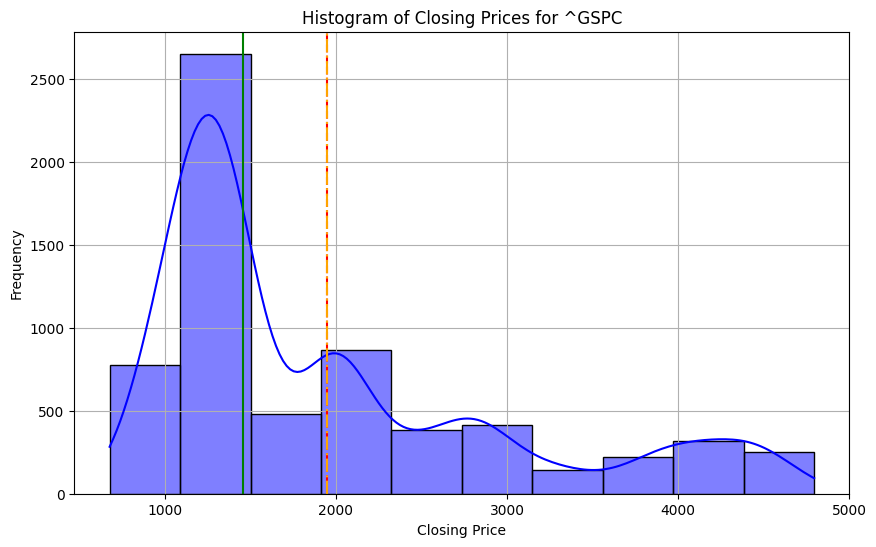

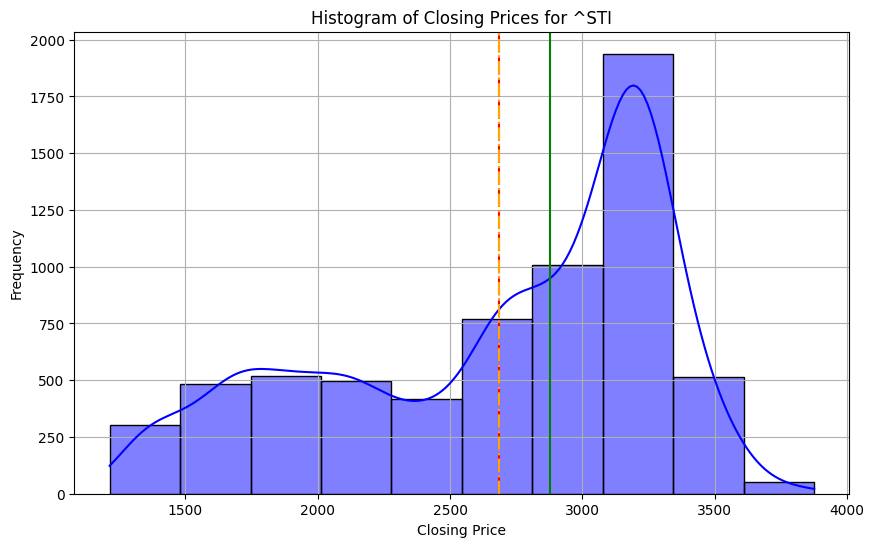

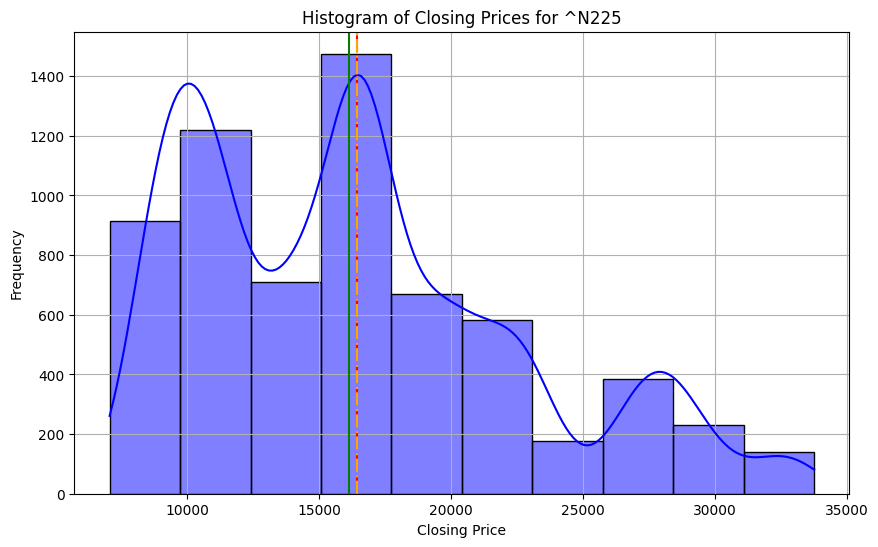

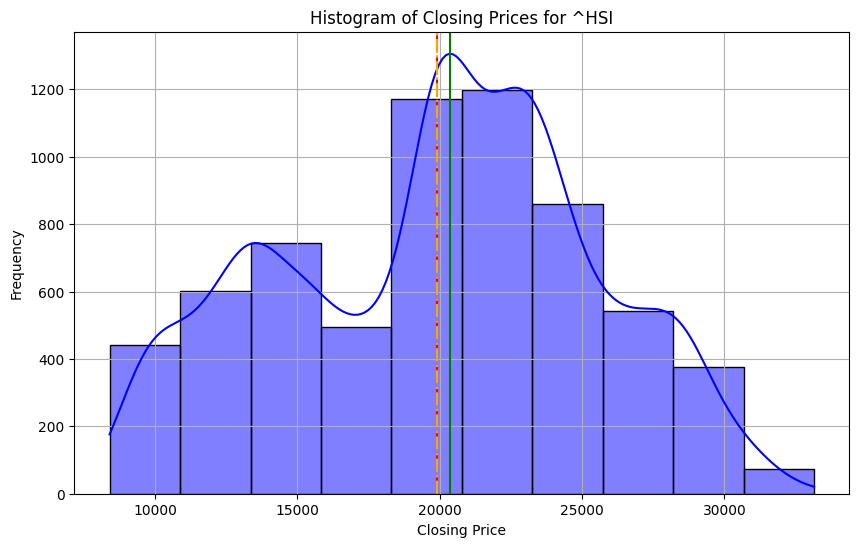

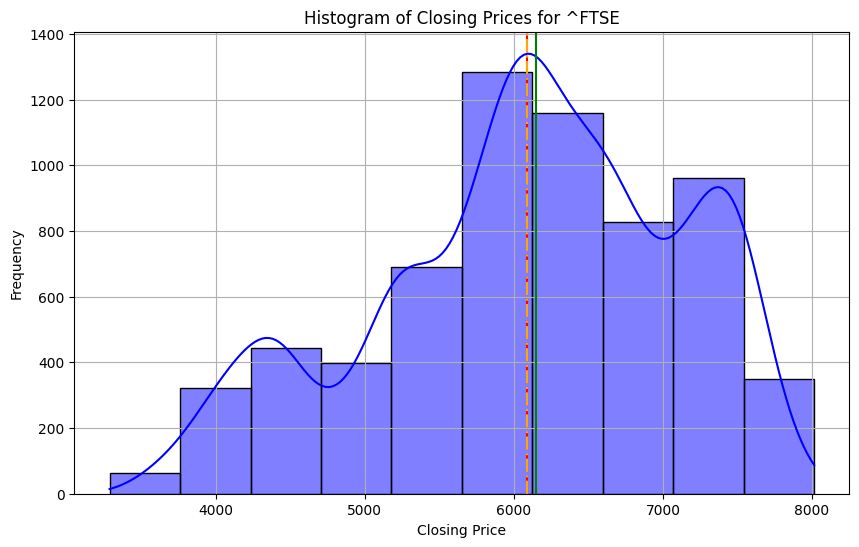

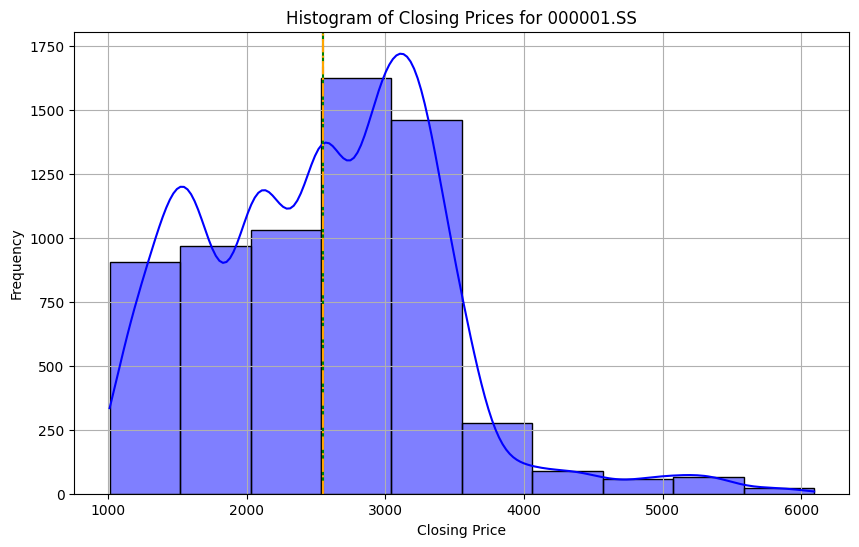

In [ ]:

for ticker in symbols:

  # Filter for the specific ticker
  tickerData = finalDf[finalDf['Ticker'] == ticker]


  mean = tickerData['Close'].mean()
  median = tickerData['Close'].median()
  mode = tickerData['Close'].mode()[0]


  # Plot the histogram
  # mean is indicated by red, median by green and mode by orange.
  plt.figure(figsize=(10, 6))
  sns.histplot(data=tickerData, x='Close', bins=10, kde=True, color='blue')
  plt.title("Histogram of Closing Prices for "+ticker)
  plt.xlabel("Closing Price")
  plt.ylabel("Frequency")
  plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
  plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
  plt.axvline(mode, color='orange', linestyle='-.', label=f'Mode: {mode:.2f}')
  plt.grid(True)
  plt.show()

The histogram above shows the mean,mode, median and the number of closing prices that belong to that range of closing prices such as from 1000 to 2000 in 0000001.SS has around 1300 closing prices in the 1000-1500 range and 900 closing prices that belongs to the range of 1500-2000. From this, we can see if the median,mode and mean is reasonable. For all of these datasets, the mean price would be the best central tendency method to define the center value of the closing prices of stock indices as it is the sum of all values divided by the total number of closing prices and we can see that it is close to the middle in all charts.

<h3>4.3)Measures Of Spread</h3>

The measures of spread that we will be looking at will be the standard deviation which measures how far a data point is away from the mean of the data and the interquartile range which describes the range between the third quartile and first quartile.

Due to the limitations as stated above in section 4.2,as every ticker has different currencies, we shall only get the measures of spread of every ticker in the dataframe.

In the following codes and description below, we shall get the standard deviation and interquartile range.

In [ ]:
groupedByTicker = finalDf.groupby('Ticker')


statisticalResults = groupedByTicker['Close'].agg(
    Min=('min'),
    Max=('max'),
    StdDev=('std'),  # Standard deviation
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25)  # Interquartile Range
)

print(statisticalResults)

                   Min           Max       StdDev          IQR
Ticker                                                        
000001.SS  1011.499023   6092.057129   852.476892  1238.889679
^FTSE      3287.000000   8014.299805  1021.948796  1416.374634
^GSPC       676.530029   4796.560059  1030.464236  1228.759918
^HSI       8409.009766  33154.121094  5533.944832  8413.542969
^N225      7054.979980  33753.328125  6186.763676  8960.672607
^STI       1213.819946   3875.770020   626.579488  1033.182495


<h3>4.4)Measures Of Spread Density Visualisation</h3>

Due to the amount of tickers we have, we are only going to focus on describing the stock indices of ^GSPC and less descriptions on the other tickers.

We use visualisations to better understand the spread of closing prices and where they are clustered, we visualize the data using density plots. These plots highlight the distribution of closing prices and indicate key measures of spread, such as


1.   Standard Deviation
*  Indicated by green, orange and purple for 1 standard deviation, 2 standard deviation and 3 standard deviation away from the mean indicated in the first density plot.
2.   Interquartile Range
*   indicated by blue and red for Q1 and Q3 respectively in the second density plot



Therefore, with these two measures of spread, we shall see what results these measures of spread show in the code and graphs below.



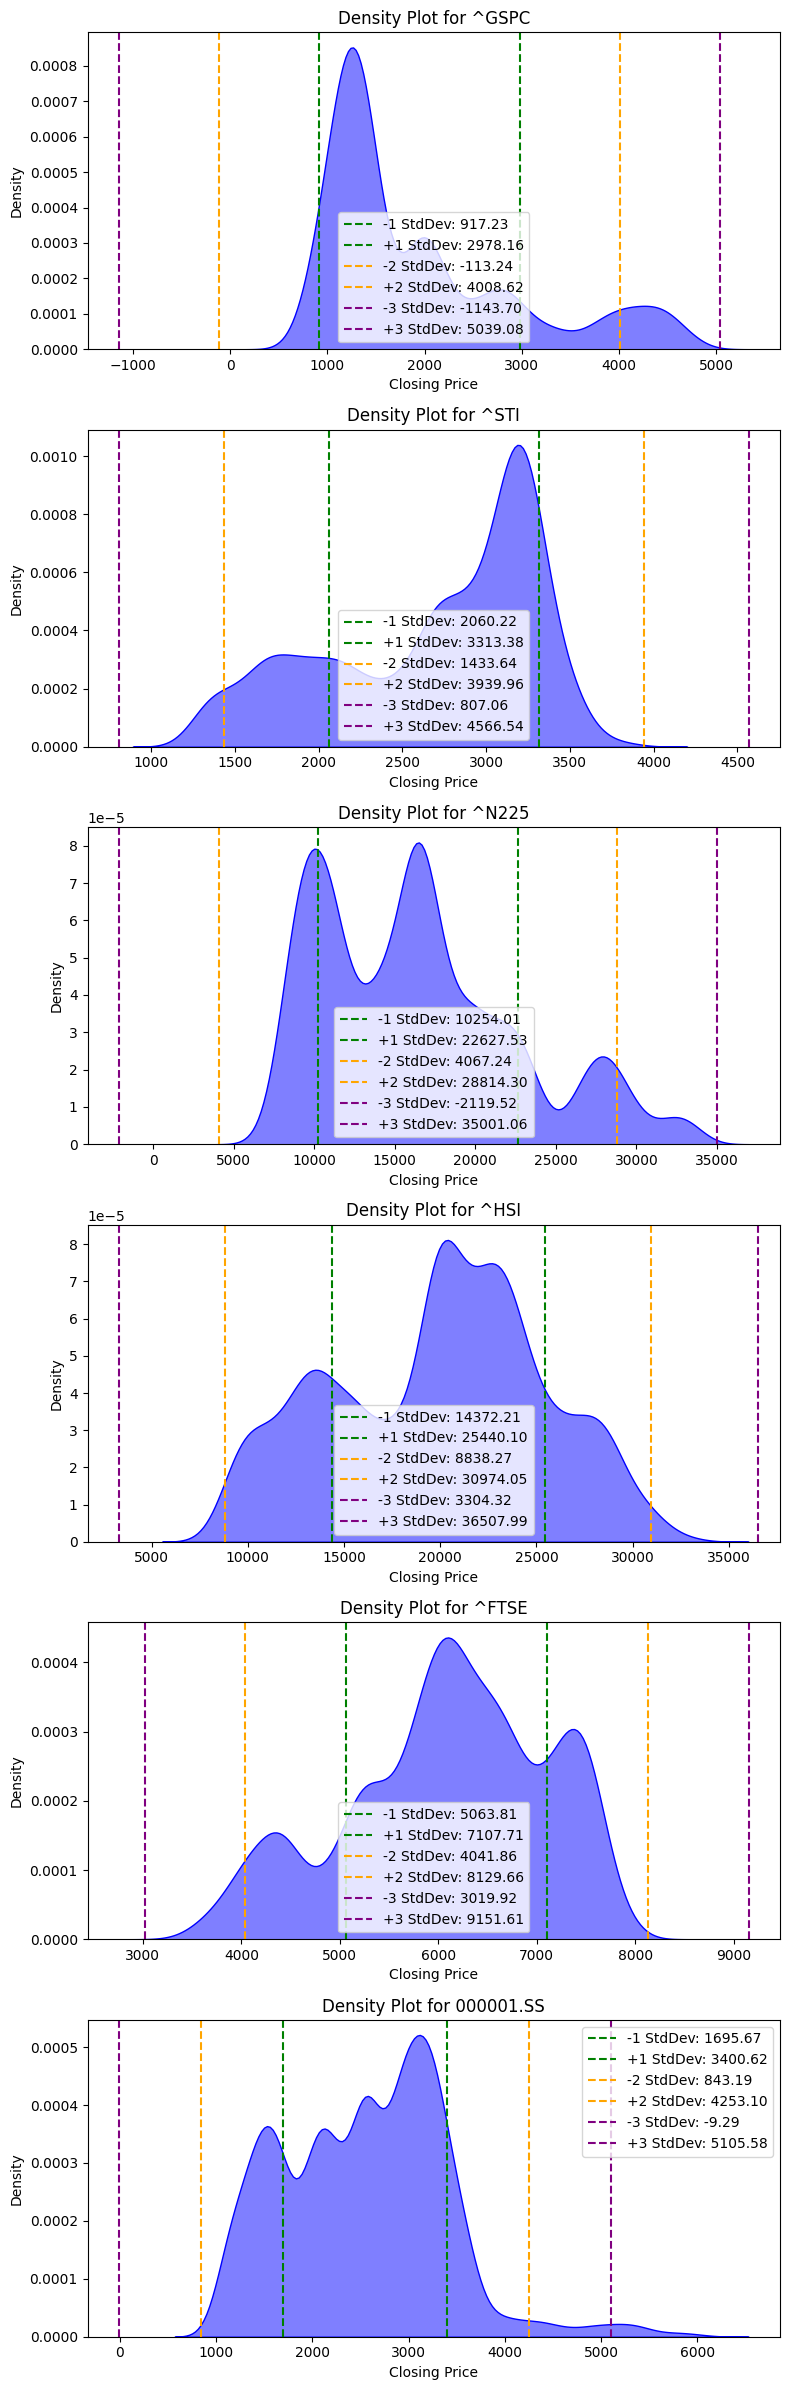

In [ ]:
fig, axes = plt.subplots(len(finalDf['Ticker'].unique()), 1, figsize=(8, len(finalDf['Ticker'].unique()) * 4))

# Loop through each unique ticker
for i, ticker in enumerate(finalDf['Ticker'].unique()):
    subset = finalDf[finalDf['Ticker'] == ticker]['Close']  # Filter data for the current ticker
    mean = subset.mean()
    std_dev = subset.std()

    #defining ranges for standard deviations which are 1 standard deviation, 2standard deviation and 3 standard deviation away from the mean.
    range_1_std = [mean - std_dev, mean + std_dev]
    range_2_std = [mean - 2 * std_dev, mean + 2 * std_dev]
    range_3_std = [mean - 3 * std_dev, mean + 3 * std_dev]

    # Plot density plot for the subset
    sns.kdeplot(subset, fill=True, alpha=0.5, ax=axes[i], color="blue")

    #Adding the ranges for standard deviation as vertical lines
    axes[i].axvline(range_1_std[0], color='green', linestyle='--', label=f'-1 StdDev: {range_1_std[0]:.2f}')
    axes[i].axvline(range_1_std[1], color='green', linestyle='--', label=f'+1 StdDev: {range_1_std[1]:.2f}')
    axes[i].axvline(range_2_std[0], color='orange', linestyle='--', label=f'-2 StdDev: {range_2_std[0]:.2f}')
    axes[i].axvline(range_2_std[1], color='orange', linestyle='--', label=f'+2 StdDev: {range_2_std[1]:.2f}')
    axes[i].axvline(range_3_std[0], color='purple', linestyle='--', label=f'-3 StdDev: {range_3_std[0]:.2f}')
    axes[i].axvline(range_3_std[1], color='purple', linestyle='--', label=f'+3 StdDev: {range_3_std[1]:.2f}')




    # Customize the subplot
    axes[i].set_title(f"Density Plot for {ticker}")
    axes[i].set_xlabel("Closing Price")
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

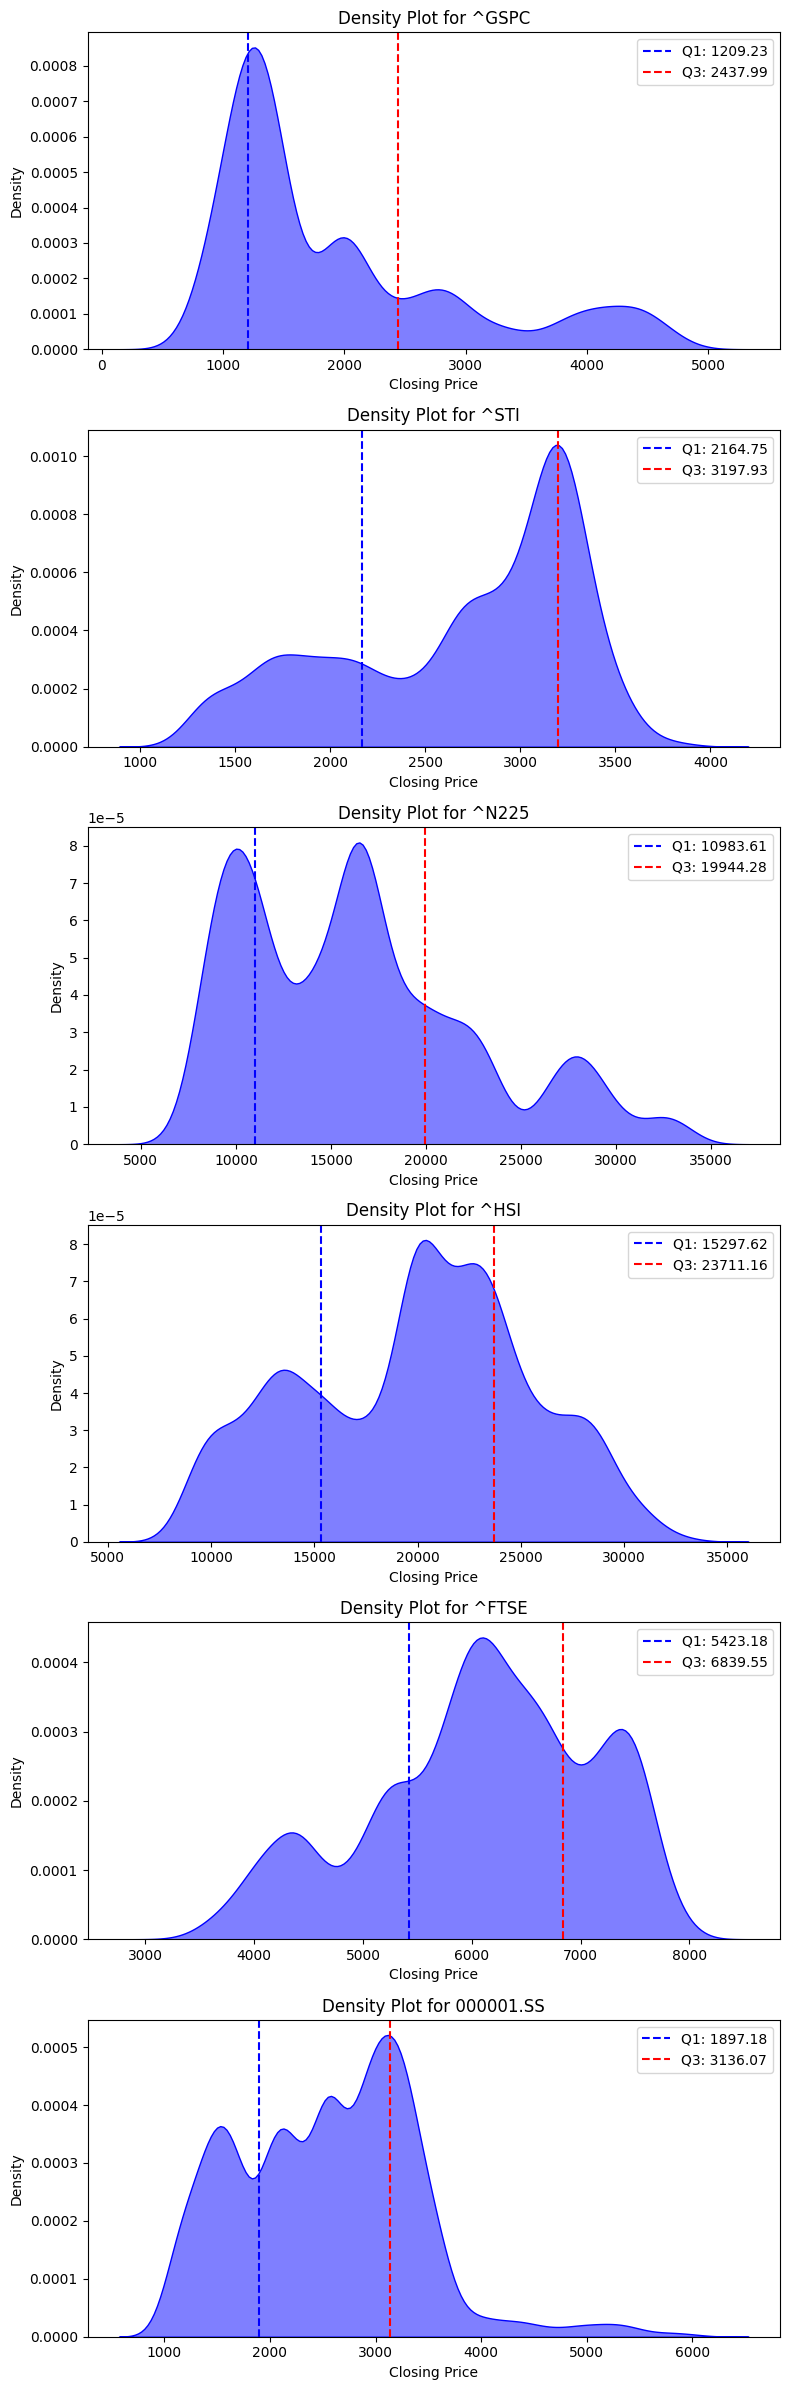

In [ ]:
fig, axes = plt.subplots(len(finalDf['Ticker'].unique()), 1, figsize=(8, len(finalDf['Ticker'].unique()) * 4))

# Loop through each unique ticker
for i, ticker in enumerate(finalDf['Ticker'].unique()):
    subset = finalDf[finalDf['Ticker'] == ticker]['Close']  # Filter data for the current ticker
    q1 = subset.quantile(0.25)  # Calculate Q1
    q3 = subset.quantile(0.75)  # Calculate Q3
     # Add Q1 and Q3 as vertical lines
    axes[i].axvline(q1, color='blue', linestyle='--', label=f'Q1: {q1:.2f}')
    axes[i].axvline(q3, color='red', linestyle='--', label=f'Q3: {q3:.2f}')

    # Plot density plot for the subset
    sns.kdeplot(subset, fill=True, alpha=0.5, ax=axes[i], color="blue")


    # Customize the subplot
    axes[i].set_title(f"Density Plot for {ticker}")
    axes[i].set_xlabel("Closing Price")
    axes[i].legend()


    # Adjust layout
plt.tight_layout()
plt.show()


The results of the first graph which is the standard deviation graph shows that majority of the data lies in 1 standard deviation away from the mean and less data in the 2 standard deviation away from the mean and only few samples lie in the 3 standard deviation away from the mean. Therefore, it suggests that the mean is a good central tendency to use for the dataset.

The interquartile range density plot graph for ^GSPC shows that most of the stock's closing prices are concentrated within range of 1200 to 2500, which indicates a moderate spread of the closing prices.

For both density plots of standard deviation graph and range density plot graph for ^GSPC, the skewness of the graph is right skewed meaning that a higher closing price occur but at a rare occassion where they close up higher than the mean during the 25 years.

<h3>4.5)Types Of Distribution</h3>

In the following codes and graph below, we shall determine the type of distribution based on factors such as kurtosis and skewness to help us find out about the shape of the dataset.

With this, we shall only focus primarily on describing the kurtosis and skewness of the ticker of ^GSPC as it would be unreasonable to clump the tickers all together when they are all stocks of different currencies. The skewness measures the symmetry of the distribution while the kurtosis measures the heaviness of the distribution tails.

The following codes shall describe the kurtosis and skewness of ^GSPC as seen below.

In [ ]:
groupedByTicker = finalDf.groupby('Ticker')

# Calculate statistical measures, including skewness and kurtosis
statisticalResults = groupedByTicker['Close'].agg(
    Skewness=('skew'),  # Skewness
    Kurtosis=lambda x:x.kurtosis()   # Kurtosis
)

# Print results
print(statisticalResults)

           Skewness  Kurtosis
Ticker                       
000001.SS  0.484016  0.637430
^FTSE     -0.412824 -0.546120
^GSPC      1.208154  0.360361
^HSI      -0.147071 -0.791722
^N225      0.733513 -0.156602
^STI      -0.656285 -0.790083


From the results above, we can see that ^GSPC have a skewness of 1.21 which means that it has a long right-tail as a skewness of more than 0 means that it has a long right-tail and the kurtosis of 0.36 means that it is leptokurtic as it is  0.36 which is more than the kurtosis of 3 as pandas library measure the excess kurtosis. The kurtosis means that the distribution has fatter tails as compared to a normal distribution.

<br>

The next section shall tell us more with the graph that we will see for the skewness and kurtosis.

<h3>4.6)Types Of Distribution Visualisation</h3>



For this section, we shall make use of visualisation to see the skewness and kurtosis of the dataset. The visualisation shall mainly focus on the ticker of ^GSPC and describing the visualisation of ^GSPC. The goal is to check if the interpretations of the results in the section before is described accurately which is to see if ^GSPC has a long right-tail and have fatter tails as compared to a normal distribution.

The code and graph is seen below in the code section

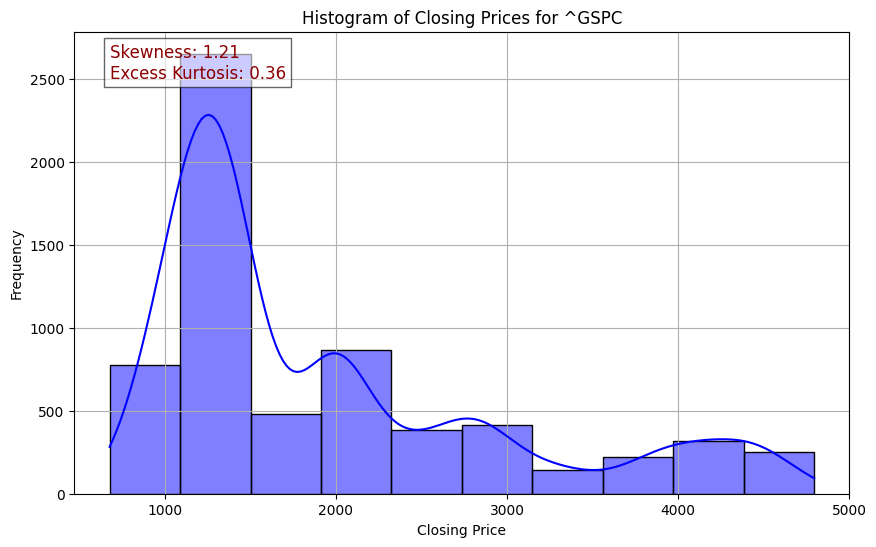

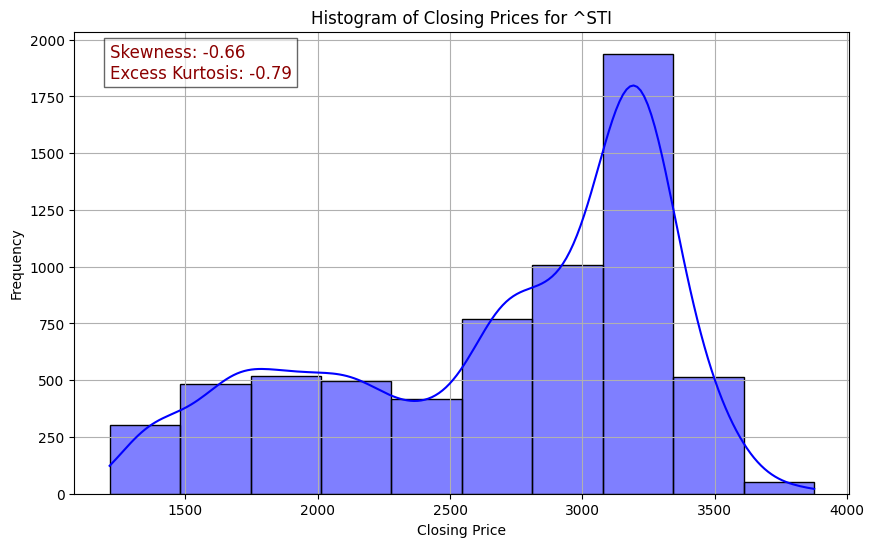

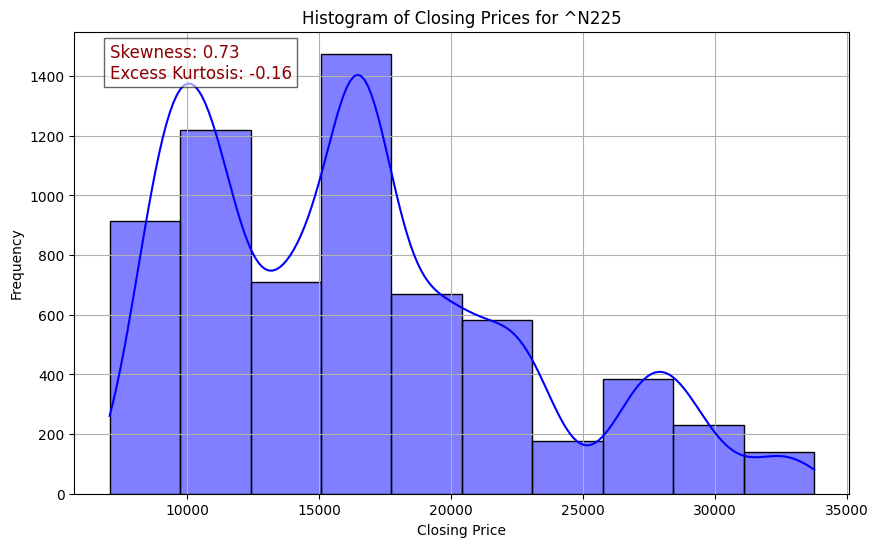

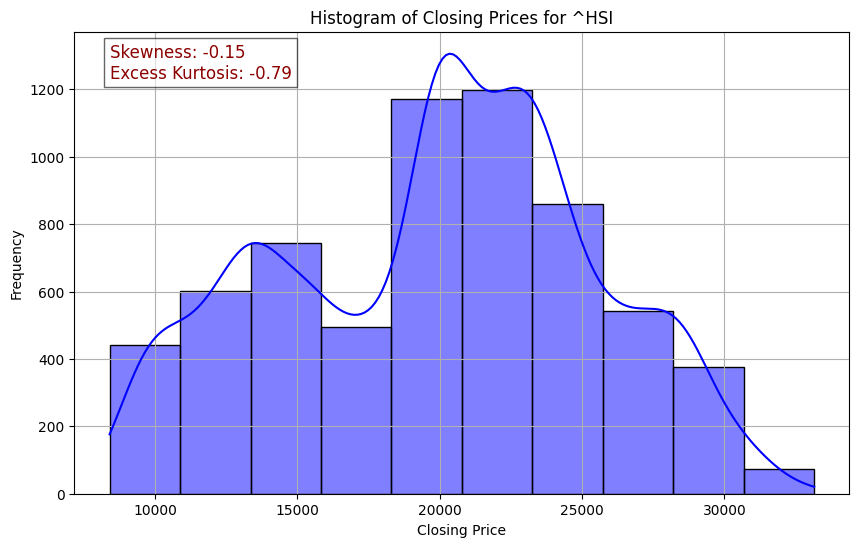

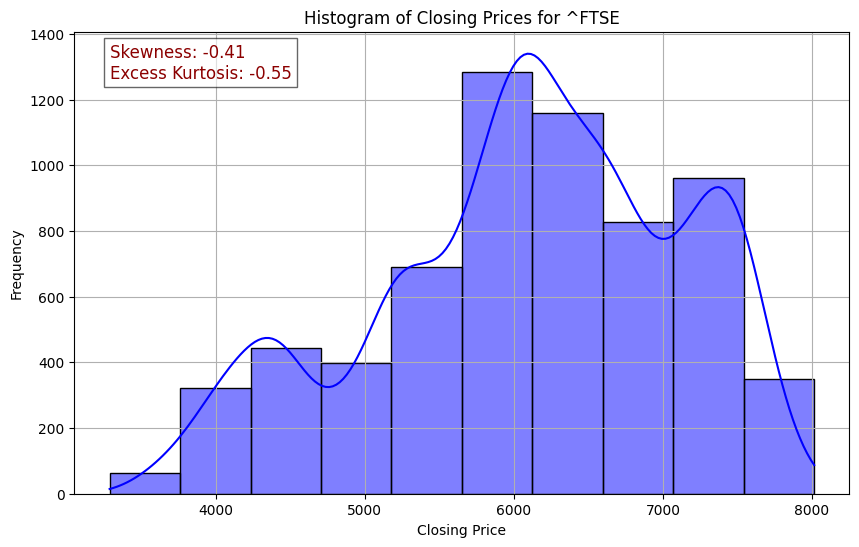

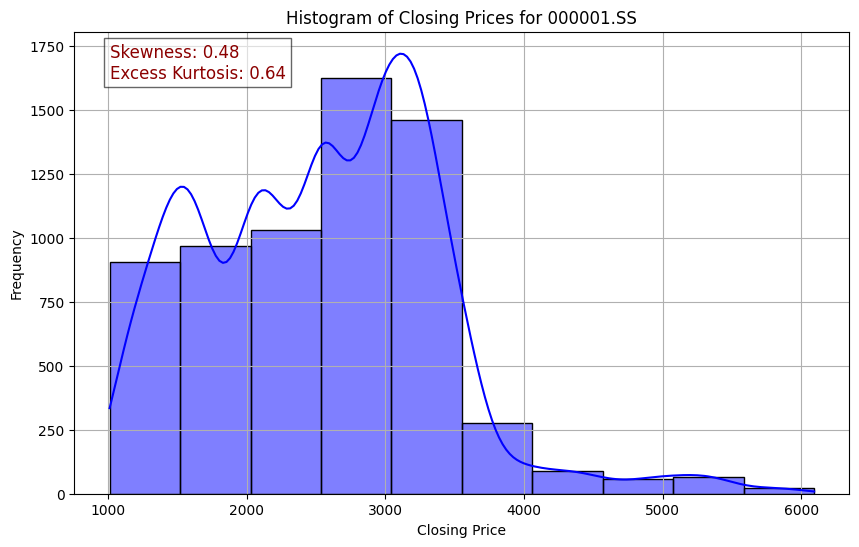

In [ ]:
for ticker in symbols:
    tickerData = finalDf[finalDf['Ticker'] == ticker]

    # Calculate skewness and kurtosis
    tickerSkewness = tickerData['Close'].skew()
    tickerKurtosis = tickerData['Close'].kurtosis() # Excess kurtosis

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=tickerData, x='Close', bins=10, kde=True, color='blue')
    plt.title(f"Histogram of Closing Prices for {ticker}")
    plt.xlabel("Closing Price")
    plt.ylabel("Frequency")

    # Annotate skewness and kurtosis
    plt.text(x=min(tickerData['Close']), y=plt.gca().get_ylim()[1] * 0.9,
             s=f"Skewness: {tickerSkewness:.2f}\nExcess Kurtosis: {tickerKurtosis:.2f}",
             fontsize=12, color='darkred', bbox=dict(facecolor='white', alpha=0.6))

    plt.grid(True)
    plt.show()

From the graph above, we can see that the results of section 4.5 is correct as the graph does show a longer right-tail and also a slightly fatter tail as compared to that of a normal distribution where we can see there were fluctuations in the closing price of 1800 to 3000 price range where it should have been a smooth descend for a normal distribution. Therefore, the statistic results in section 4.5 was correct.

<h3>4.7)Date And Closing Price Visualisation</h3>

In the following section below, we shall visualise the closing price as the vertical axis and the date as the vertical axis to find out trends about the closing prices as the time period gets longer.

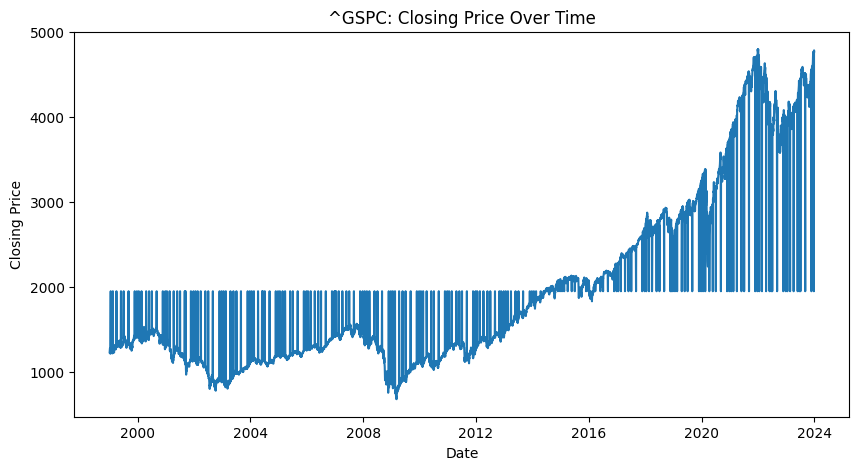

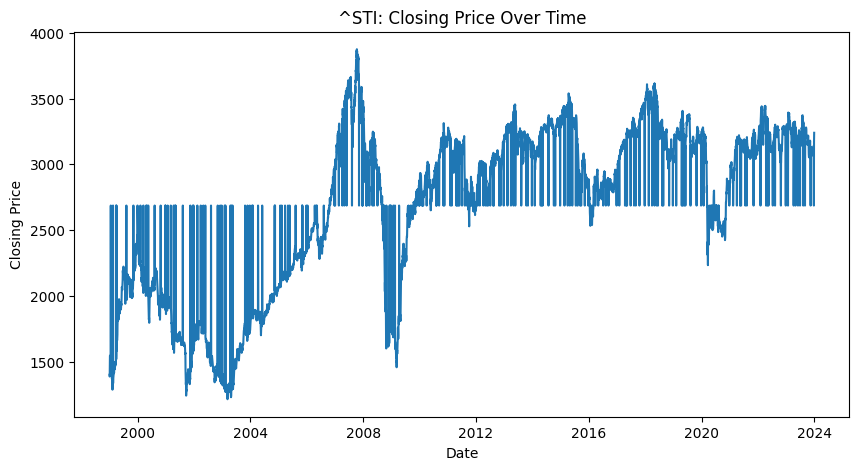

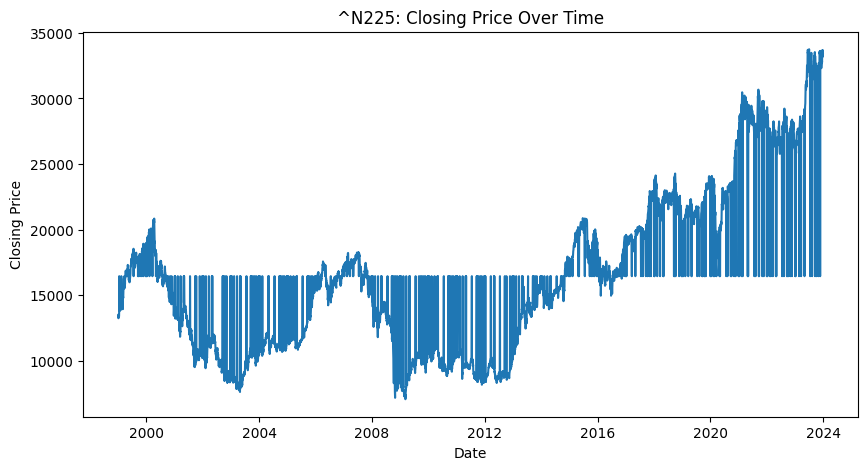

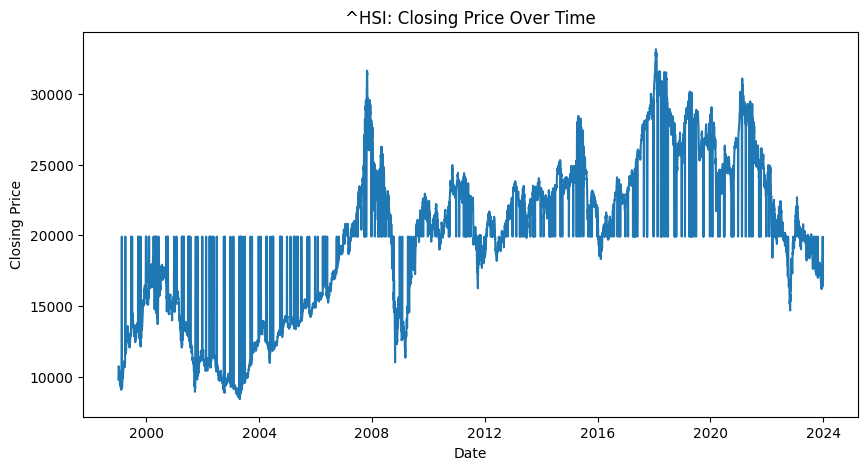

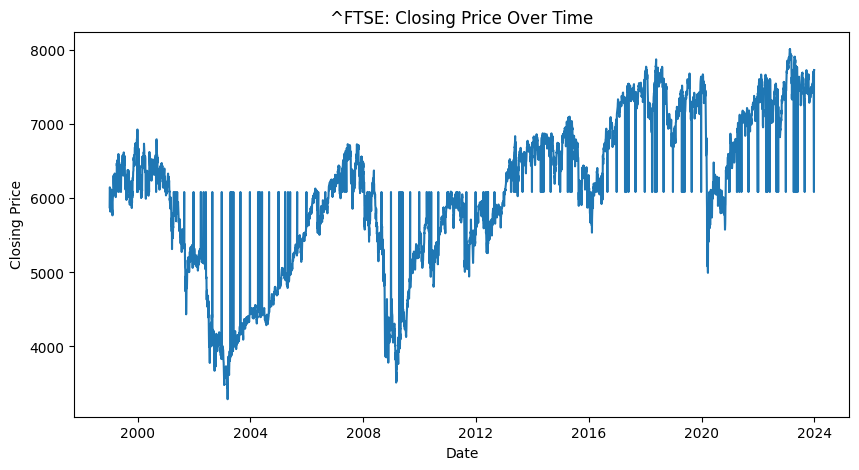

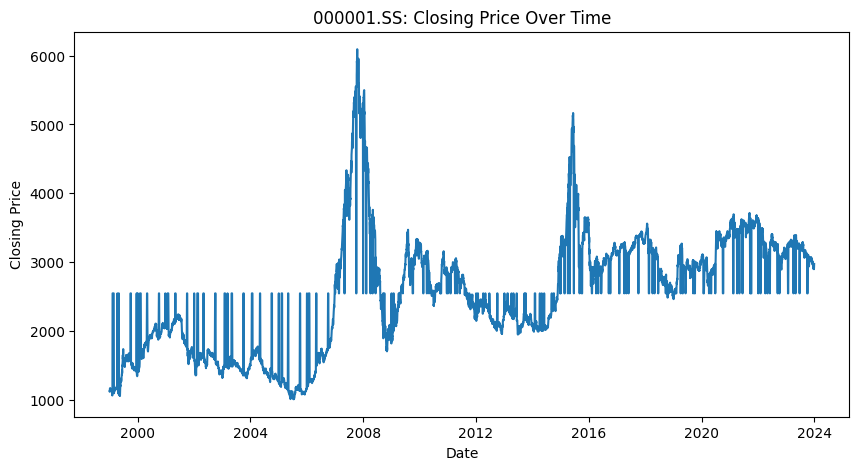

In [ ]:
for ticker in symbols:
    tickerData = finalDf[finalDf['Ticker'] == ticker]

    plt.figure(figsize=(10, 5))
    plt.plot(tickerData['Date'], tickerData['Close'])
    plt.title(f"{ticker}: Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.show()

From the graph and chart above, it is fascinating that not all charts would lead to the same amount of increment. From the charts above, it seems that only ^GSPC would have increased over the past 20 years whereas the STI,HSI,FTSE show signs of fluctuations around the original level 10 years back and only ^GSPC show signs of increment steadily over the past 20 years which is an interesting finding.

<h3>4.8)The Best Visualisation Findings</h3>

The best visualisation findings would be the standard deviation density plot for ^GSPC,where we found that majority of the data lies in the 1 standard deviation and a price shift towards the 3000-5000 range happens but occassionally. The findings from that assumes that the shift would happen but is an event that does not happen too frequently. We also found out from other stock indices data that more of the data are in the 2 standard deviation or 3 standard deviation away from the mean which makes the findings even more interesting. From the stock indices,FTSE which has shown more data points residing in 2 standard deviation and some outliers in 3 standard deviations away from the mean, the price of FTSE has remained stagnant at around 6000 to 8000 price range whereas for ^GSPC, it has seen an increment of 1000 to 4000 at the past decade.

The second example would be from the price chart of 000001.SS where majority of the closing price lie in the 1 standard deviation zone but the price is fluctuating unstable from 2000 to 4000. The ^GSPC would seemingly have the best yields out of the stock market indices. Therefore, the density plot for standard deviation of ^GSPC would be the most important visualisation findings.

<h3>5)Building The Machine Learning Model</h3>

<h3>5.1)Methodology</h3>

The machine learning model focuses on finding the stock indices price based on the interest rate and predicting if interest rate affects the stock indices pricing.

The machine learning model begins with splitting the dataset into training, validation and then maintaining a hold-out set as the test set where the label would be the closing prices of the stock indices and the features would be the interest rate and could include the date after all initial testings are done with the interest rate and closing prices.

After which, we would build a model and validate using scores such as the R² score,Mean Squared Error(MSE) and Root Mean Squared Error(RMSE) and use techniques such as k-fold cross validation to validate the results.


<h3>5.2)Training,Validation and Test Set Split</h3>
We begin to split the dataset into 0.8,0.2 with the training set and validation set as 0.8 of the dataset and the 0.2 of the entire dataset as test set to test and also inserting a new column called Date_ordinal to transform the date into a numerical value.

In [ ]:
finalDf['Date_Ordinal'] = finalDf['Date'].map(lambda x: x.toordinal()) ## creating a new column called date_ordinal to transform the date into a numerical value.
encoder = LabelEncoder()
finalDf['Ticker_Encoded'] = encoder.fit_transform(finalDf['Ticker'])

In [ ]:
X = finalDf[['InterestRate','Date_Ordinal','Ticker_Encoded']]
y = finalDf['Close']


## splitting up the into the 0.6:0.2:0.2 for training,validation and test set.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.25, random_state=42)


print(xTrain.shape,yTrain.shape)
print(xVal.shape,yVal.shape)
print(xTest.shape,yTest.shape)


# creating a linear regression model
model = LinearRegression()
# fitting the model with the x_train and y_train data
model.fit(xTrain, yTrain)

(23400, 3) (23400,)
(7800, 3) (7800,)
(7800, 3) (7800,)


LinearRegression()

<h3>5.3)Validation</h3>
The validation result are shown below in the code of testing against the validation set and using the k-fold cross validation and finally the test set to validate results and results with description are seen in the code and text boxes below.
<h4>5.3.1)Validation Code</h4>

In [ ]:

yPred = model.predict(xVal)
r2 = r2_score(yVal, yPred)
mse = mean_squared_error(yVal, yPred)
rmse = np.sqrt(mse)

print(f" R Score: {r2:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")

 R Score: 0.15
 Mean Squared Error (MSE): 53212711.60
 Root Mean Squared Error (RMSE): 7294.70


In [ ]:
##K-fold Cross Validation

# Merging the xTrain,yTrain back to the dataset
xTrain = np.concatenate((xTrain, xVal),axis=0)
yTrain = np.concatenate((yTrain, yVal),axis=0)

print(f"The shape of xTrain is:{xTrain.shape}")
print(f"The shape of yTrain is:{yTrain.shape}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
mse_scores = []
rmse_scores = []


for train_index, val_index in kf.split(xTrain):
    xTrainKFold, xValKFold = xTrain[train_index], xTrain[val_index]
    yTrainKFold, yValKFold = yTrain[train_index], yTrain[val_index]

    # Train Linear Regression Model
    model = LinearRegression()
    model.fit(xTrainKFold, yTrainKFold)

    # Predict on Validation Set
    yPred = model.predict(xValKFold)

    # Evaluate Performance
    r2 = r2_score(yValKFold, yPred)
    mse = mean_squared_error(yValKFold, yPred)
    rmse = np.sqrt(mse)

    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

print("The scores are as follows with r2,mse and rmse in the following order:")
print(r2_scores)
print(mse_scores)
print(rmse_scores)

The shape of xTrain is:(31200, 3)
The shape of yTrain is:(31200,)
The scores are as follows with r2,mse and rmse in the following order:
[0.1566887350380527, 0.13840051133954934, 0.15306487251347567, 0.14849829454763586, 0.14118850939349503]
[54102877.01589466, 53604338.038269676, 53454012.39512472, 53687670.0623148, 55218572.50079647]
[7355.465791905681, 7321.498346531923, 7311.2250953670355, 7327.187049769836, 7430.920030574711]


In [ ]:
print(f" Average R² Score: {np.mean(r2_scores):.2f}")
print(f" Average Mean Squared Error (MSE): {np.mean(mse_scores):.2f}")
print(f" Average Root Mean Squared Error (RMSE): {np.mean(rmse_scores):.2f}")

 Average R² Score: 0.15
 Average Mean Squared Error (MSE): 54013494.00
 Average Root Mean Squared Error (RMSE): 7349.26


In [ ]:

yPred = model.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)
print(yPred)
print(f" R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

[12419.9160886   4172.1874856   6748.40701337 ...  9889.56054078
 14433.06698164  7981.8691393 ]
 R² Score: 0.16
Mean Squared Error (MSE): 55313421.60
Root Mean Squared Error (RMSE): 7437.30


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<h4>5.3.2)Validation Results Analysis</h4>

From the results displayed above, we can see that the R² score, mean squared error and root mean squared error shows that the model was not capable of identifying the stock prices and the description of each results would be described here.

The R² value is calculated by 1 - (sum of squared error divided by total sum of squares) and the value of 0.16 shows that the model only explains 16% of the variance in stock prices, meaning that 84% of the variation remains unexplained. This indicates that the model is not effectively capturing the relationship between interest rates, date,tickers, and stock prices. A higher R² score, closer to 1.0, would suggest a better fit, whereas an R² of 0.16 suggests that the model is performing poorly and has limited predictive power

For the Mean Squared Error, A large squared error of 5531836.93 means that it has a very large error and the model does not perform well.

For the Root Mean Squared Error, it shows a root mean squared error of 7437.26 which means that the model does not perform well and predicts the stock prices poorly.

With both the mean squared error and root mean squared error is the sum of  the result of actual value deducted by the predicted value divided by the number of datapoints where one is squared and one is the root mean squared.


<h3>5.4)Adjusting Data For Better Performance</h3>

The adjustment in the dataset instead of using the whole dataset which consist of prices that are too far apart in range with the same interest rate and date but different ticker is because the linear regression model might not capture the relationship between the ticker,interest rate, date and the closing price. Therefore, we have to change it to the dataset which consist of one ticker only. The relationship might be too complex for the linear regression model to capture.

<h4>5.4.1)Adjustment Data Code</h4>
In the following codes below, we use the gspc data which consist of tickers with gspc and repeat the steps in the sections before to evaluate the model results.

In [ ]:
gspcData = finalDf[finalDf['Ticker'] == '^GSPC']

X = gspcData[['InterestRate','Date_Ordinal']]
y = gspcData['Close']

## splitting up the into the 0.6:0.2:0.2 for training,validation and test set.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.25, random_state=42)


print(xTrain.shape,yTrain.shape)
print(xVal.shape,yVal.shape)
print(xTest.shape,yTest.shape)


# creating a linear regression model
model = LinearRegression()
# fitting the model with the x_train and y_train data
model.fit(xTrain, yTrain)

(3900, 2) (3900,)
(1300, 2) (1300,)
(1300, 2) (1300,)


LinearRegression()

<h4>5.4.2)Adjustment Data Validations</h4>
In the following codes below, we have the validation code and results for the adjustment data.

In [ ]:
yPred = model.predict(xVal)
r2 = r2_score(yVal, yPred)
mse = mean_squared_error(yVal, yPred)
rmse = np.sqrt(mse)

print(f" R² Score: {r2:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")

 R² Score: 0.80
 Mean Squared Error (MSE): 200926.90
 Root Mean Squared Error (RMSE): 448.25


In [ ]:
##K-fold Cross Validation

# Merging the xTrain,yTrain back to the dataset
xTrain = np.concatenate((xTrain, xVal),axis=0)
yTrain = np.concatenate((yTrain, yVal),axis=0)

print(f"The shape of xTrain is:{xTrain.shape}")
print(f"The shape of yTrain is:{yTrain.shape}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
mse_scores = []
rmse_scores = []


for train_index, val_index in kf.split(xTrain):
    xTrainKFold, xValKFold = xTrain[train_index], xTrain[val_index]
    yTrainKFold, yValKFold = yTrain[train_index], yTrain[val_index]

    # Train Linear Regression Model
    model = LinearRegression()
    model.fit(xTrainKFold, yTrainKFold)

    # Predict on Validation Set
    yPred = model.predict(xValKFold)

    # Evaluate Performance
    r2 = r2_score(yValKFold, yPred)
    mse = mean_squared_error(yValKFold, yPred)
    rmse = np.sqrt(mse)

    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

print("The scores are as follows with r2,mse and rmse in the following order:")
print(r2_scores)
print(mse_scores)
print(rmse_scores)


The shape of xTrain is:(5200, 2)
The shape of yTrain is:(5200,)
The scores are as follows with r2,mse and rmse in the following order:
[0.7931967361664761, 0.804048044506952, 0.7859800646203091, 0.8071731858286697, 0.7896529396223229]
[201735.69254158833, 208697.87410151694, 233672.50111441207, 208378.10525509543, 235877.15066886885]
[449.14996664988, 456.8346244556305, 483.3968360616483, 456.4845071358889, 485.6718549276547]


In [ ]:
print(f" Average R² Score: {np.mean(r2_scores):.2f}")
print(f" Average Mean Squared Error (MSE): {np.mean(mse_scores):.2f}")
print(f" Average Root Mean Squared Error (RMSE): {np.mean(rmse_scores):.2f}")

 Average R² Score: 0.80
 Average Mean Squared Error (MSE): 217672.26
 Average Root Mean Squared Error (RMSE): 466.31


<h4>5.4.3)Adjustment Data Results Validation Description</h4>

The results of the Average R² Score has improved from 0.15 to 0.80 in this section after adjusting the data in section 5.4.


Additionally, the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) have significantly decreased:

1.   MSE reduced from 53855928.07 to 202670.58
2.   RMSE reduced from 7338.34 to 466.31


In [ ]:
yPred = model.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)
print(yPred)
print(f" R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

[1556.26035162 3648.15704555 1687.9362526  ... 1970.94652365  910.76877535
  745.53449756]
 R² Score: 0.80
Mean Squared Error (MSE): 202670.58
Root Mean Squared Error (RMSE): 450.19


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<h4>5.4.4)Adjustment Data Results Description</h4>

In the following code sections, we present the results obtained after the model learned patterns from the adjusted dataset.

The R² score of 0.80 indicates that the model explains 80% of the variance in stock prices, meaning that only 20% of the variation remains unexplained. This suggests a significant improvement compared to the previous model.

Additionally, the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) have significantly decreased:



1.   MSE reduced from 55312836.93 to 202670.58
2.   RMSE reduced from 7437.26 to 450.19


These improvements confirm that the model now makes more accurate predictions after adjusting the dataset. However, some degree of error still remains.

Overall, the model performed better and demonstrated a stronger understanding of stock price movements when trained on a single ticker, suggesting that analyzing each ticker separately can lead to more accurate predictions.

<h3>5.5)Feature Engineering</h3>

From topic 5.4, we have learnt to use the polynomial features and we implement the polynomial features to the linear regression model with the adjusted dataset of only one ticker to find out if the feature engineering would yield a better result as compared to the previous model that does not use the polynomial feature to find out more complex relationship between the interest rate, date ordinal and the closing price of the stock indice.


<h4>5.5.1)Train-Val-Test Split And Defining Model Pipeline</h4>

In the code below, we split the dataset of only GSPC into training,validation and test dataset and use the make_pipeline function to make a pipeline and use the polynomialfeatures(degree=2) to create new polynomial features.

In [ ]:

gspcData = finalDf[finalDf['Ticker'] == '^GSPC']


X = gspcData[['InterestRate', 'Date_Ordinal']]
y = gspcData['Close']


xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.25, random_state=42)

print(xTrain.shape,yTrain.shape)
print(xVal.shape,yVal.shape)
print(xTest.shape,yTest.shape)


polyModel = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polyModel.fit(xTrain, yTrain)




(3900, 2) (3900,)
(1300, 2) (1300,)
(1300, 2) (1300,)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

<h4>5.5.2)Validation Set And Test Set Results</h4>

In the following validation set,k-fold cross validation set and test set, we use the poly model to predict the closing price and the following codes are shown to display results.

In [ ]:
yPred = polyModel.predict(xVal)


r2Poly = r2_score(yVal, yPred)
msePoly = mean_squared_error(yVal, yPred)
rmsePoly = np.sqrt(msePoly)


print(f" R² Score (Polynomial Regression): {r2Poly:.2f}")
print(f" Mean Squared Error (MSE): {msePoly:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmsePoly:.2f}")

 R² Score (Polynomial Regression): 0.93
 Mean Squared Error (MSE): 70569.91
 Root Mean Squared Error (RMSE): 265.65


In [ ]:
##K-fold Cross Validation

# Merging the xTrain,yTrain back to the dataset
xTrain = np.concatenate((xTrain, xVal),axis=0)
yTrain = np.concatenate((yTrain, yVal),axis=0)

print(f"The shape of xTrain is:{xTrain.shape}")
print(f"The shape of yTrain is:{yTrain.shape}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
mse_scores = []
rmse_scores = []


for train_index, val_index in kf.split(xTrain):
    xTrainKFold, xValKFold = xTrain[train_index], xTrain[val_index]
    yTrainKFold, yValKFold = yTrain[train_index], yTrain[val_index]

    # Train Linear Regression Model
    polyModel = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    polyModel.fit(xTrainKFold, yTrainKFold)

    # Predict on Validation Set
    yPred = polyModel.predict(xValKFold)

    # Evaluate Performance
    r2 = r2_score(yValKFold, yPred)
    mse = mean_squared_error(yValKFold, yPred)
    rmse = np.sqrt(mse)

    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

print("The scores are as follows with r2,mse and rmse in the following order:")
print(r2_scores)
print(mse_scores)
print(rmse_scores)

The shape of xTrain is:(5200, 2)
The shape of yTrain is:(5200,)
The scores are as follows with r2,mse and rmse in the following order:
[0.928837093396739, 0.9235950172002091, 0.9292122331138565, 0.932201405508309, 0.919142087926927]
[69419.10867730717, 81374.83211615641, 77287.9148255213, 73266.48381269397, 90671.73971714056]
[263.475062723794, 285.2627422502918, 278.00704096393184, 270.6778229051911, 301.1174849077027]


In [ ]:
print(f" Average R² Score: {np.mean(r2_scores):.2f}")
print(f" Average Mean Squared Error (MSE): {np.mean(mse_scores):.2f}")
print(f" Average Root Mean Squared Error (RMSE): {np.mean(rmse_scores):.2f}")

 Average R² Score: 0.93
 Average Mean Squared Error (MSE): 78404.02
 Average Root Mean Squared Error (RMSE): 279.71


In [ ]:
yPred = polyModel.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)
print(yPred)
print(f" R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


[1280.88251139 4033.3247542  1206.26880832 ... 1259.51072311 1300.59582859
 1560.68757953]
 R² Score: 0.94
Mean Squared Error (MSE): 63200.36
Root Mean Squared Error (RMSE): 251.40


<h4>5.5.3)Feature Engineering Results</h4>

The final results of the model is shown to improve after using the polynomial features to identify non-linear relationships between the variables.

The following results have improved as seen from the following scores:
1.   R² increased from 0.80 to 0.94
2.   MSE reduced from 202670.58 to 63200.36
3.   RMSE reduced from 450.19 to 251.40

From the scores above, we see that the R² score have improved as now the model explains 94% of the variance in the price of stock indices and MSE and RMSE have also decreased from the original higher values With the RMSE value being lower than the standard deviation shows that the model is useful for predicting stock prices with the two variables date and interest rate.

<h3>6)Evaluation Of The Machine Learning Model</h3>


| Model | R² Score | MSE | RMSE |
|-------|---------|--------|--------|
| Linear Regression | 0.80 | 202670.58 | 450.19 |
| Linear Regression With Polynomial Features | 0.94 | 63200.36 | 251.40 |

From the results above, we can see that the Linear Regression model with Polynomial Features achieved an R² score of 0.94, meaning it explains 94% of the variance in stock indices prices.

This indicates that the model effectively captures non-linear relationships between interest rates, time, and stock prices, providing a much better fit compared to standard Linear Regression.

Additionally, the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) have significantly decreased, suggesting that the model's predictions are more accurate and closer to the actual stock prices.

Even though the mean squared error and the root mean squared error is quite large, the root mean squared error is still lower than one standard deviation for ^GSPC which is 1030.46. Therefore, the model still produces an error that is in the acceptable range of predicting the price of stock indices.

The three evaluation metrics R² Score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are important as they quantify the relationship between the features and the target variable while also measuring how far the predicted values deviate from the actual stock prices.

Despite not being able to use the full stock indices dataset, it is still easy to replicate the machine learning model by changing the ticker from ^GSPC to other ticker so that the machine learning model could predict the prices of the stock indices. It appears that the machine learning model could not learn about the prices and yield worst results if a number of different stock indices with a far price range and different patterns were included. Therefore, we can only choose the ticker which we wanted to find out the most to use.




The contribution to the sub-domain areas would be that the model can be used to further find out from stock-indices to how interest rate might affect an individual stocks and can be replicated from stocks to bonds to any financial instruments that are affected by time and interest rates.

The machine learning model could also be replicated in other areas, such as the healthcare industry, where predicting trends over time is crucial. For example, during a pandemic such as SARS, COVID-19, or future outbreaks, the number of infections over time tends to increase in a non-linear pattern.

(400 words)

<h3>Conclusion</h3>

The conclusion from the project is that a linear regression model with date and interest rate as inputs are useful for predicting a single stock indice's price but may not be efficient if multiple stock indices are lumped together in the same dataset and the project can be replicated easily for every stock indices by changing the ticker from ^GSPC to other tickers.

<h3> **References**</h3>

(No date) Stocks dive after fed cuts rates, signals slower easing pace in 2025 | reuters. Available at: https://www.reuters.com/markets/us/futures-inch-higher-markets-await-fed-decision-2024-12-18/ (Accessed: 01 January 2025).

(No date a) Why 2022 was such a bad year for the stock market - washington post. Available at: https://www.washingtonpost.com/business/interactive/2022/stock-market-sp500-down-this-year/ (Accessed: 05 January 2025).

Implementation note issued November 2, 2022 (2022) Federal Reserve Board - Implementation Note issued November 2, 2022. Available at: https://www.federalreserve.gov/newsevents/pressreleases/monetary20221102a1.htm (Accessed: 06 January 2025).


Market expects interest rates to rise by ‘end of 2022, early 2023,’ analyst says (2021) Yahoo! Finance. Available at: https://finance.yahoo.com/news/market-expects-interest-rates-to-rise-end-of-2022-early-2023-analyst-says-152425931.html (Accessed: 06 January 2025).


Federal Reserve Economic Data (no date) Getting To Know FRED. Available at: https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/ (Accessed: 06 January 2025).

Federal funds effective rate (2025) FRED. Available at: https://fred.stlouisfed.org/series/FEDFUNDS (Accessed: 06 January 2025).

Yfinance (no date) PyPI. Available at: https://pypi.org/project/yfinance/ (Accessed: 06 January 2025).






In [ ]:
!pip install nbconvert
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!jupyter nbconvert --to pdf DS_Mid.ipynb

from google.colab import drive
drive.mount("/content/drive")


!jupyter nbconvert --to pdf --output DS_Mid.pdf DS_Mid.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[NbConvertApp] WARNING | pattern 'DS_Mid.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equ

In [ ]:

!jupyter nbconvert --to pdf --output DS_Mid2.pdf "/content/drive/MyDrive/Colab Notebooks/DS_Mid.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DS_Mid.ipynb to pdf
[NbConvertApp] Writing 116738 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 111668 bytes to /content/drive/MyDrive/Colab Notebooks/DS_Mid2.pdf
